In [1]:
import jax.numpy as jnp
import jax
from fbpinns.problems import Problem

class Poisson1D(Problem):
    """
    Solves the 1D Poisson equation
        - u_xx = f(x,y)
    on the domain [0,1] with Dirichlet boundary conditions u = 0 on ∂Ω.

    We choose f(x,y) such that the exact solution is:
        u(x,y) = sin(πx)
    which implies f(x,y) = π²sin(πx).
    """

    @staticmethod
    def init_params(f_coeff=jnp.pi ** 2, sd=0.1):
        # 'dims': (ud, xd) => u is scalar (ud=1) and x is 2D (xd=2)
        static_params = {
            "dims": (1, 1),
            "f_coeff": f_coeff,  # coefficient in the forcing function f(x,y)
            "sd": sd
        }
        return static_params, {}

    @staticmethod
    def sample_constraints(all_params, domain, key, sampler, batch_shapes):
        # --- Physics loss: sample interior points ---
        # x_batch_phys: an array of shape (n_phys, 2)
        x_batch_phys = domain.sample_interior(all_params, key, sampler, batch_shapes[0])
        required_ujs_phys = (
            (0, (0, 0)), # u_xx
        )

        return [[x_batch_phys, required_ujs_phys],]
    
    @staticmethod
    def constraining_fn(all_params, x_batch, u):
        sd = all_params["static"]["problem"]["sd"]
        x, tanh = x_batch[:,0:1], jax.nn.tanh
        u = tanh((x)/sd) * tanh((1-x)/sd) * u
        return u

    @staticmethod
    def loss_fn(all_params, constraints):
        # --- Physics loss ---
        # For the physics group, the constraints have been replaced with the evaluated quantities:
        # [x_batch_phys, u_xx, u_yy]
        x_phys, u_xx = constraints[0]
        x = x_phys[:, 0:1]

        # Compute the forcing term f(x,y) = 2π² sin(πx) sin(πy)
        f_coeff = all_params["static"]["problem"]["f_coeff"]
        f_val = f_coeff * jnp.sin(jnp.pi* x)

        # The physics residual is: u_xx + u_yy + f(x,y)
        phys_residual = u_xx + f_val

        return jnp.mean(phys_residual ** 2)

    @staticmethod
    def exact_solution(all_params, x_batch, batch_shape=None):
        # The exact solution is u(x,y) = sin(πx) sin(πy)
        x = x_batch[:, 0:1]
        u = jnp.sin(jnp.pi* x)
        return u
    

[INFO] 2025-04-14 15:24:53 - <fbpinns.constants.Constants object at 0x7177e1e2a4b0>
run: test
domain: <class 'fbpinns.domains.RectangularDomainND'>
domain_init_kwargs: {'xmin': array([0.]), 'xmax': array([1.])}
problem: <class '__main__.Poisson1D'>
problem_init_kwargs: {}
decomposition: <class 'fbpinns.decompositions.RectangularDecompositionND'>
decomposition_init_kwargs: {'subdomain_xs': [array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])], 'subdomain_ws': [array([0.32222222, 0.32222222, 0.32222222, 0.32222222, 0.32222222,
       0.32222222, 0.32222222, 0.32222222, 0.32222222, 0.32222222])], 'unnorm': (0.0, 1.0)}
network: <class 'fbpinns.networks.ChebyshevAdaptiveKAN'>
network_init_kwargs: {'input_dim': 1, 'output_dim': 1, 'degree': 10}
n_steps: 15000
scheduler: <class 'fbpinns.schedulers.AllActiveSchedulerND'>
scheduler_kwargs: {}
ns: ((100,),)
n_test: (100,)
sampler: grid
optimiser: <function adam at

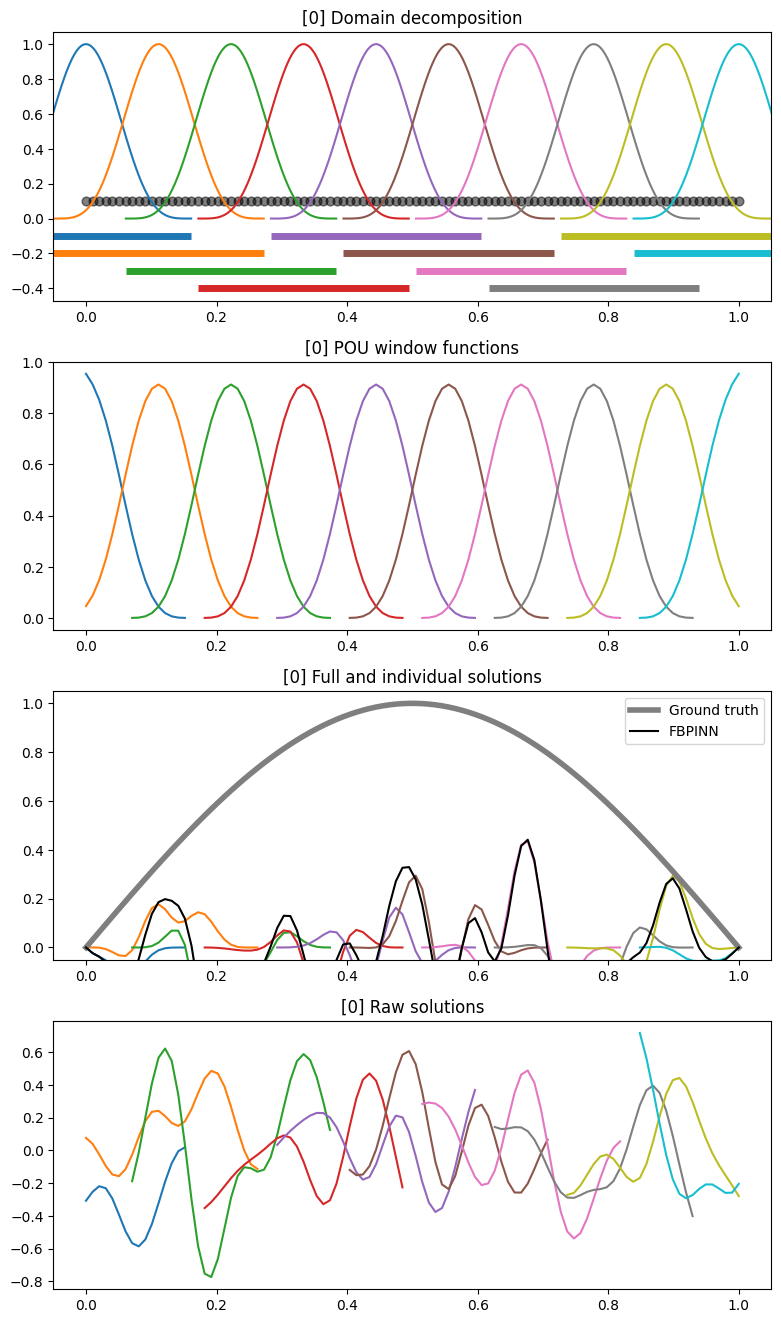

[INFO] 2025-04-14 15:25:04 - [i: 1000/15000] loss: 67.4698 rate: 181.3 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:04 - [i: 2000/15000] loss: 53.0903 rate: 6668.0 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:05 - [i: 3000/15000] loss: 44.4181 rate: 6573.1 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:05 - [i: 4000/15000] loss: 36.5192 rate: 6626.2 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:05 - [i: 5000/15000] loss: 27.7855 rate: 6696.9 elapsed: 0.00 hr test
(100, 1) (100, 1) (100, 1) (10, 100, 1) (10, 100, 1) (10, 100, 1) (100, 1) (100,)
True


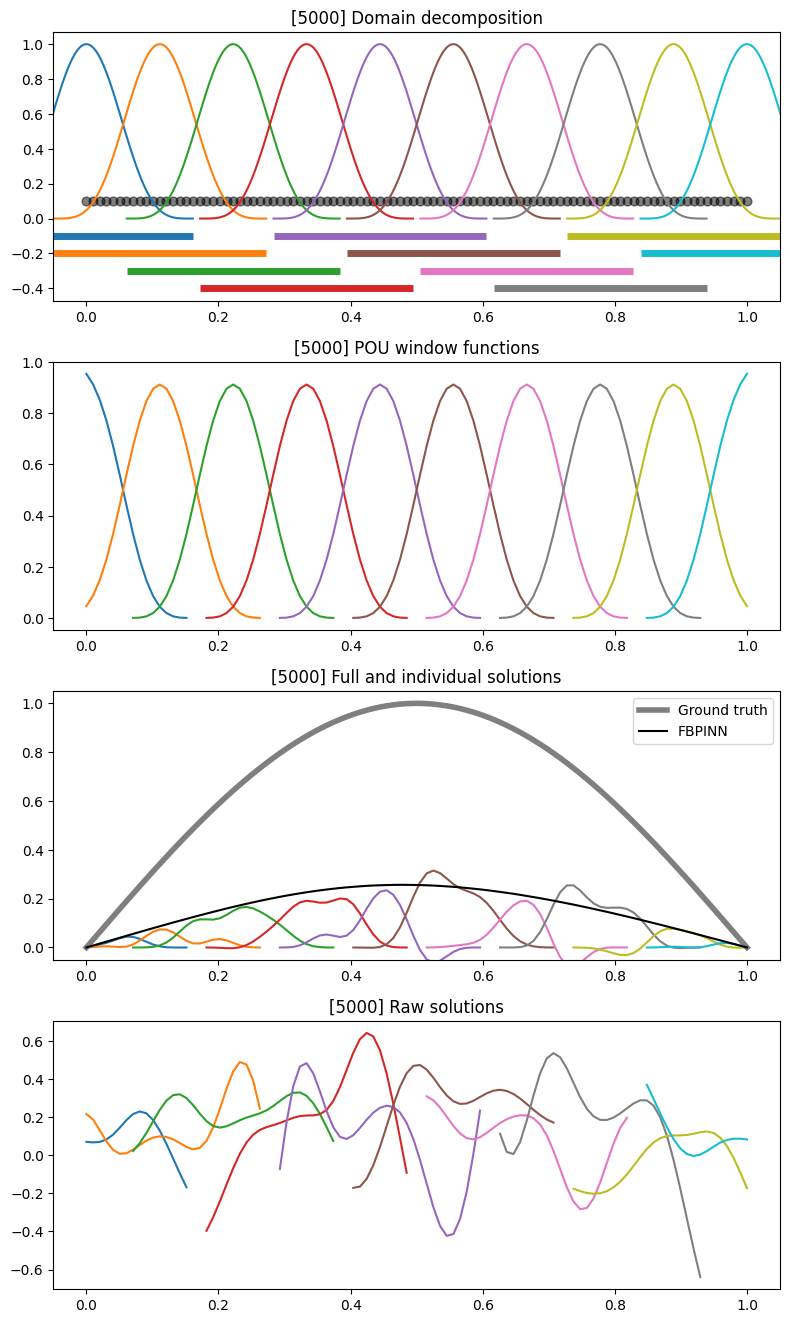

[INFO] 2025-04-14 15:25:06 - [i: 6000/15000] loss: 18.0619 rate: 6712.2 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:06 - [i: 7000/15000] loss: 9.0906 rate: 6727.5 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:06 - [i: 8000/15000] loss: 3.2202 rate: 6839.5 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:06 - [i: 9000/15000] loss: 0.9280 rate: 6906.0 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:07 - [i: 10000/15000] loss: 0.5339 rate: 6485.1 elapsed: 0.00 hr test
(100, 1) (100, 1) (100, 1) (10, 100, 1) (10, 100, 1) (10, 100, 1) (100, 1) (100,)
True


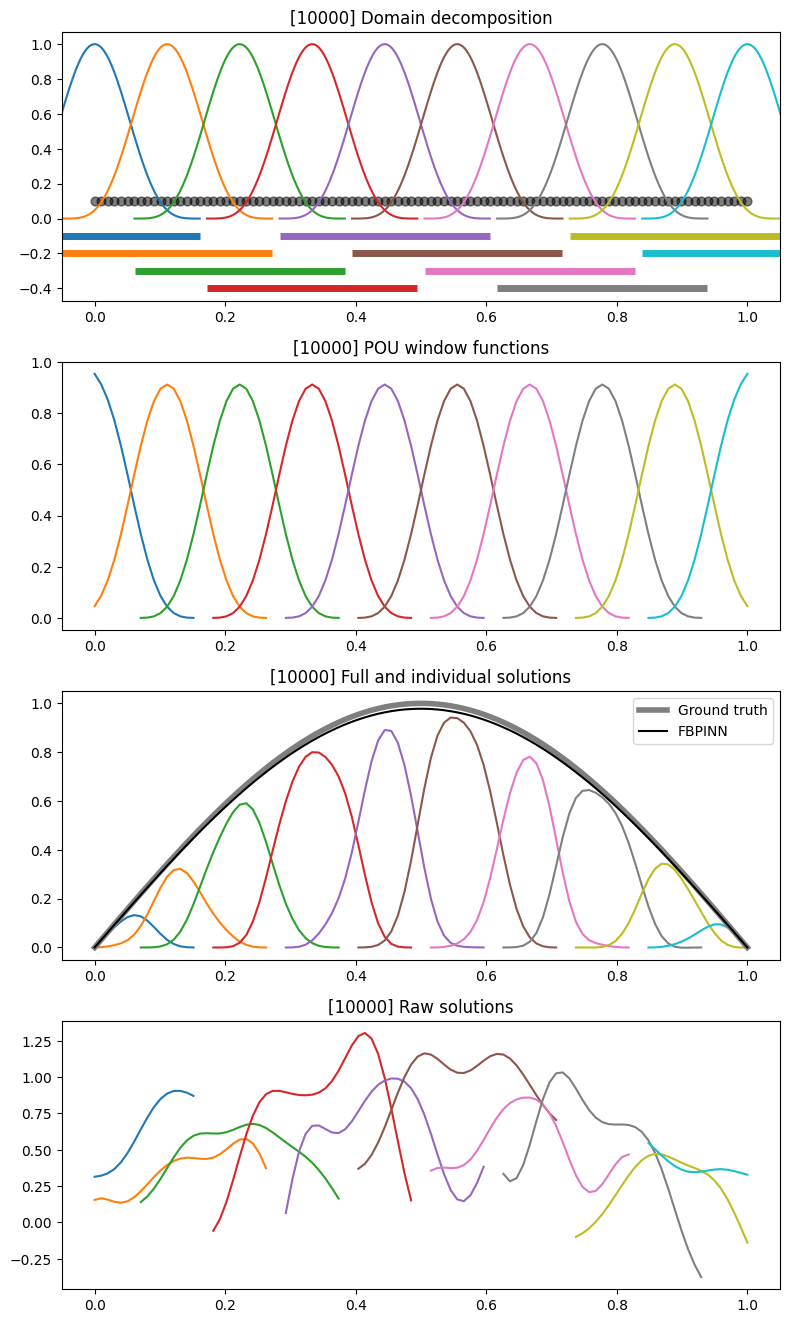

[INFO] 2025-04-14 15:25:07 - [i: 11000/15000] loss: 0.3304 rate: 6572.9 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:07 - [i: 12000/15000] loss: 0.2449 rate: 6855.3 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:08 - [i: 13000/15000] loss: 0.1855 rate: 6640.7 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:08 - [i: 14000/15000] loss: 0.1454 rate: 6607.6 elapsed: 0.00 hr test
[INFO] 2025-04-14 15:25:08 - [i: 15000/15000] loss: 0.1164 rate: 6587.2 elapsed: 0.00 hr test
(100, 1) (100, 1) (100, 1) (10, 100, 1) (10, 100, 1) (10, 100, 1) (100, 1) (100,)
True


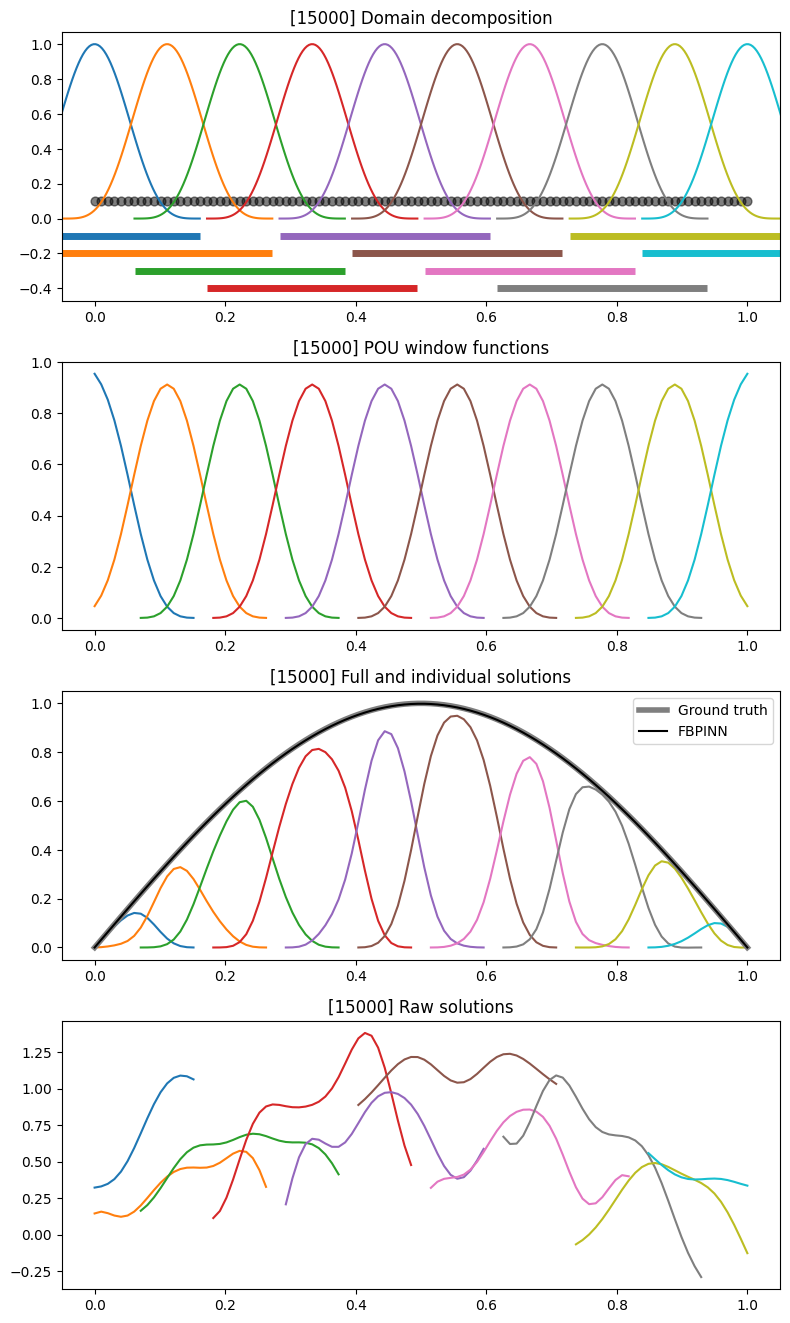

[INFO] 2025-04-14 15:25:09 - [i: 15000/15000] Training complete


In [2]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import BurgersEquation2D
from fbpinns.decompositions import RectangularDecompositionND
from fbpinns.networks import ChebyshevKAN, FCN, LegendreKAN, ChebyshevAdaptiveKAN
from fbpinns.schedulers import LineSchedulerRectangularND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

subdomain_xs=[np.linspace(0,1,10)]
c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0.,]),
        xmax=np.array([1.,])
        ),
    problem=Poisson1D,
    problem_init_kwargs = dict(),
    decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xs=subdomain_xs,
        subdomain_ws=get_subdomain_ws(subdomain_xs, 2.9),
        unnorm=(0., 1.),
    ),
    # network=FCN,
    # network_init_kwargs = dict(
    #     layer_sizes = (2, 16, 16, 1),
    # ),
    # network=LegendreKAN,
    network=ChebyshevAdaptiveKAN,
    network_init_kwargs=dict(
        input_dim=1,
        output_dim=1,
        degree=10
    ),
    # scheduler = LineSchedulerRectangularND,
    # scheduler_kwargs = dict(
    #     point=[0.], iaxis=0,
    # ),
    # First element: interior sampling shape for the physics loss (here 200 x 200 points)
    # Second element: boundary sampling shapes; for 2D, we need 4 tuples (one for each boundary)
    ns=((100,),),
    # n_test provides the test sampling shape for the interior (here also 200 x 200)
    n_test=(100,),
    n_steps=15000,
    clear_output=False,
)

run = FBPINNTrainer(c)
all_params = run.train()